# Importing the datasets

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [301]:
books = pd.read_csv('Datasets/BX_Books.csv',delimiter=';', encoding='ISO-8859-1')

In [302]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [303]:
users = pd.read_csv('Datasets/BX-Users.csv',delimiter=';', encoding='ISO-8859-1')

In [304]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [305]:
rating = pd.read_csv('Datasets/BX-Book-Ratings.csv',delimiter=';', encoding='ISO-8859-1')

In [306]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [307]:
books.shape

(271379, 8)

In [308]:
users.shape

(278858, 3)

In [309]:
rating.shape

(1149780, 3)

## Merging the 3 datasets

In [311]:
book_rec = pd.merge(users, rating , on = 'User-ID')
book_rec = pd.merge(books, book_rec , on='ISBN')

## Splitting the Location into city, state, country

In [313]:
Location = book_rec.Location.str.split(', ', n=2, expand=True)

book_rec['City'] = Location[0]
book_rec['State'] = Location[1]
book_rec['Country'] = Location[2]

In [314]:
book_rec.drop('Location', axis=1,inplace=True)

In [315]:
book_rec.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Age,Book-Rating,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,18.0,0,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,NaN,5,timmins,ontario,canada
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,49.0,0,ottawa,ontario,canada
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,NaN,8,n/a,n/a,n/a
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,NaN,0,sudbury,ontario,canada


In [316]:
book_rec.shape

(1031175, 14)

# EDA

In [318]:
import matplotlib.pyplot as plt
import seaborn as sns

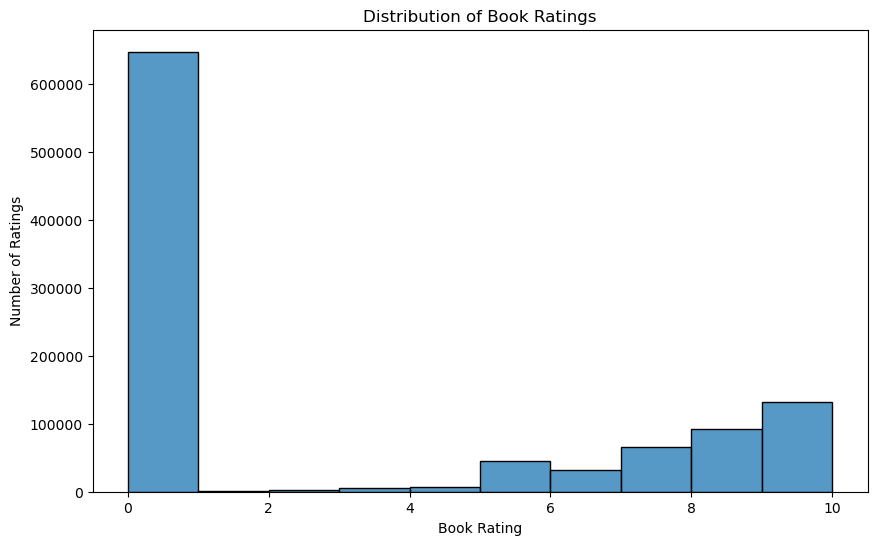

In [319]:
# Plot distribution of book ratings
plt.figure(figsize=(10, 6))
sns.histplot(book_rec['Book-Rating'], bins=10, kde=False)
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Number of Ratings')
plt.show()

Book-Author
Stephen King          10053
Nora Roberts           8429
John Grisham           6010
James Patterson        5845
Mary Higgins Clark     4777
Dean R. Koontz         4313
Tom Clancy             4036
Danielle Steel         3726
Sue Grafton            3457
Janet Evanovich        3350
Name: Book-Rating, dtype: int64


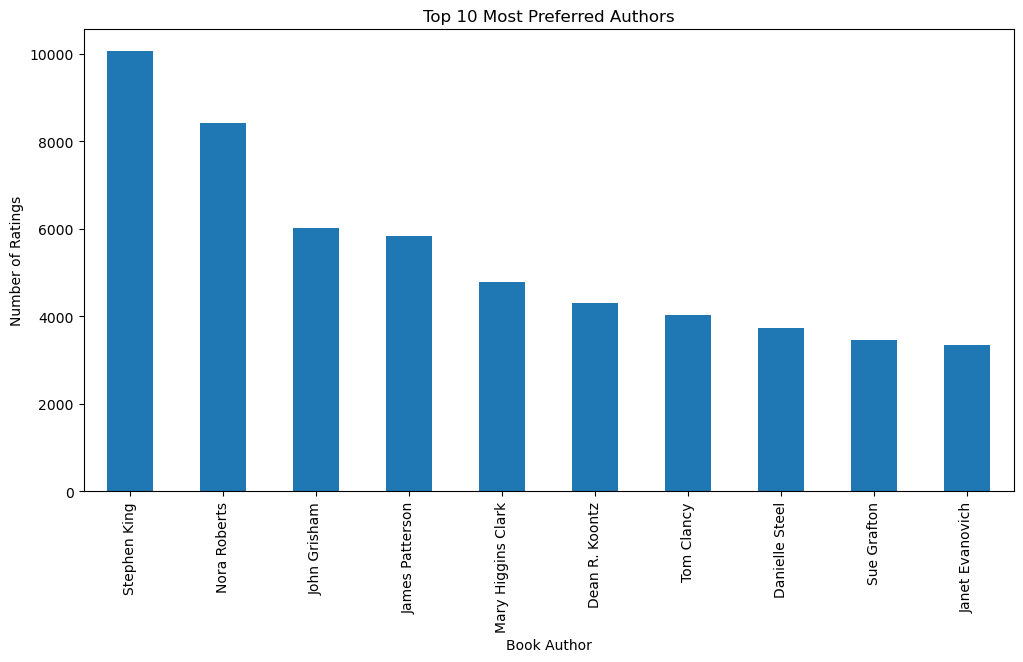

In [320]:
# Grouping by Book-Author to see the number of ratings each author has received
author_preference = book_rec.groupby('Book-Author')['Book-Rating'].count().sort_values(ascending=False)

# Display top 10 most preferred authors
print(author_preference.head(10))

# Plot the top 10 authors
plt.figure(figsize=(12, 6))
author_preference.head(10).plot(kind='bar')
plt.title('Top 10 Most Preferred Authors')
plt.xlabel('Book Author')
plt.ylabel('Number of Ratings')
plt.show()

Book-Title
Wild Animus                                        2502
The Lovely Bones: A Novel                          1295
The Da Vinci Code                                   898
A Painted House                                     838
The Nanny Diaries: A Novel                          828
Bridget Jones's Diary                               815
The Secret Life of Bees                             774
Divine Secrets of the Ya-Ya Sisterhood: A Novel     740
The Red Tent (Bestselling Backlist)                 723
Angels & Demons                                     670
Name: Book-Rating, dtype: int64


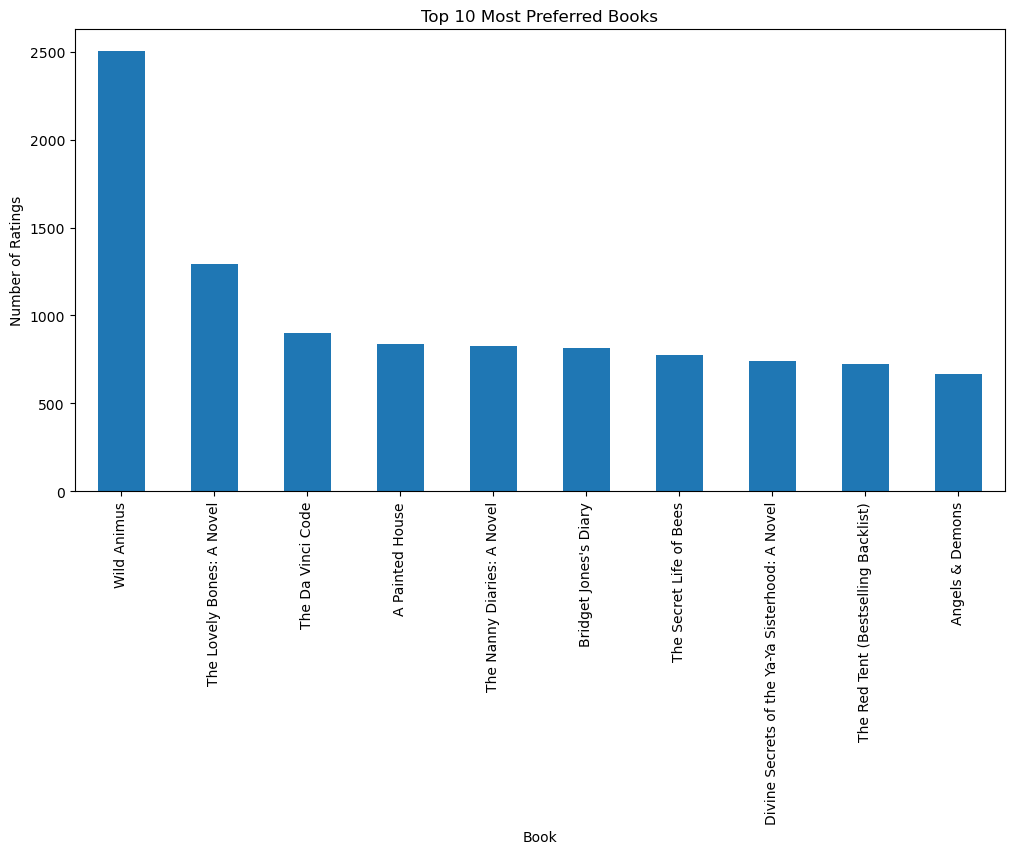

In [321]:
# Grouping by Book-rating to see the number of ratings each book has received
book_preference = book_rec.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False)

# Display top 10 most preferred books
print(book_preference.head(10))

# Plot the top 10 books
plt.figure(figsize=(12, 6))
book_preference.head(10).plot(kind='bar')
plt.title('Top 10 Most Preferred Books')
plt.xlabel('Book')
plt.ylabel('Number of Ratings')
plt.show()

Publisher
Ballantine Books            34724
Pocket                      31989
Berkley Publishing Group    28614
Warner Books                25506
Harlequin                   25029
Bantam Books                23600
Bantam                      20007
Signet Book                 19155
Avon                        17352
Penguin Books               17033
Name: Book-Rating, dtype: int64


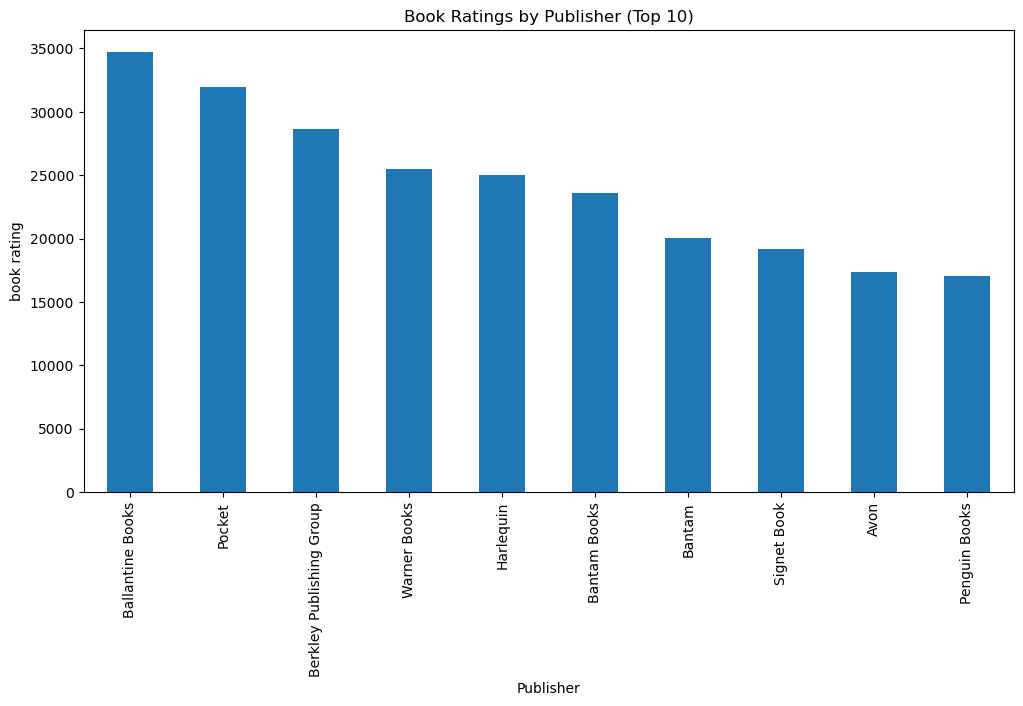

In [322]:
# Grouping by Publisher based on book ratings
country_preference = book_rec.groupby('Publisher')['Book-Rating'].count().sort_values(ascending=False)

# Display top 10 publishers with the most rating
print(country_preference.head(10))

# Plot the top 10 publishers
plt.figure(figsize=(12, 6))
country_preference.head(10).plot(kind='bar')
plt.title('Book Ratings by Publisher (Top 10)')
plt.xlabel('Publisher')
plt.ylabel('book rating')
plt.show()

Country
usa               745840
canada             92957
united kingdom     32011
germany            27655
australia          18217
spain              14774
n/a                11177
france             10632
portugal            6975
new zealand         5557
Name: Book-Rating, dtype: int64


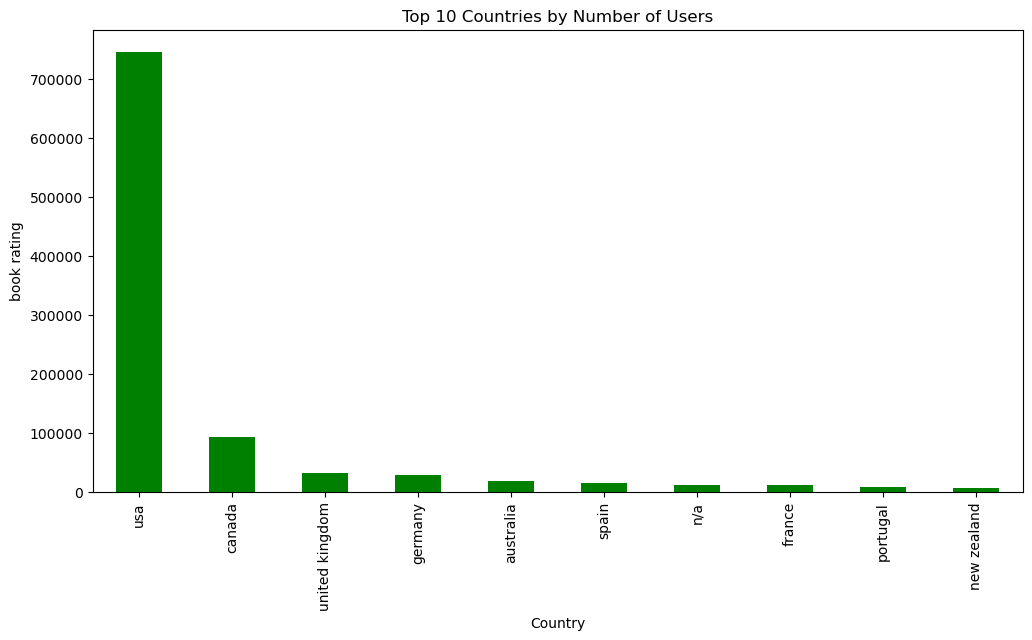

In [323]:
# Grouping by Country to see the number of users in each country
country_preference = book_rec.groupby('Country')['Book-Rating'].count().sort_values(ascending=False)

# Display top 10 countries with the most users
print(country_preference.head(10))

# Plot the top 10 countries
plt.figure(figsize=(12, 6))
country_preference.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Countries by Number of Users')
plt.xlabel('Country')
plt.ylabel('book rating')
plt.show()

Year-Of-Publication
2002    91801
2001    79803
1999    75195
2003    72539
2000    72334
1998    64209
1997    59361
1996    58826
1995    54093
1994    46444
Name: ISBN, dtype: int64


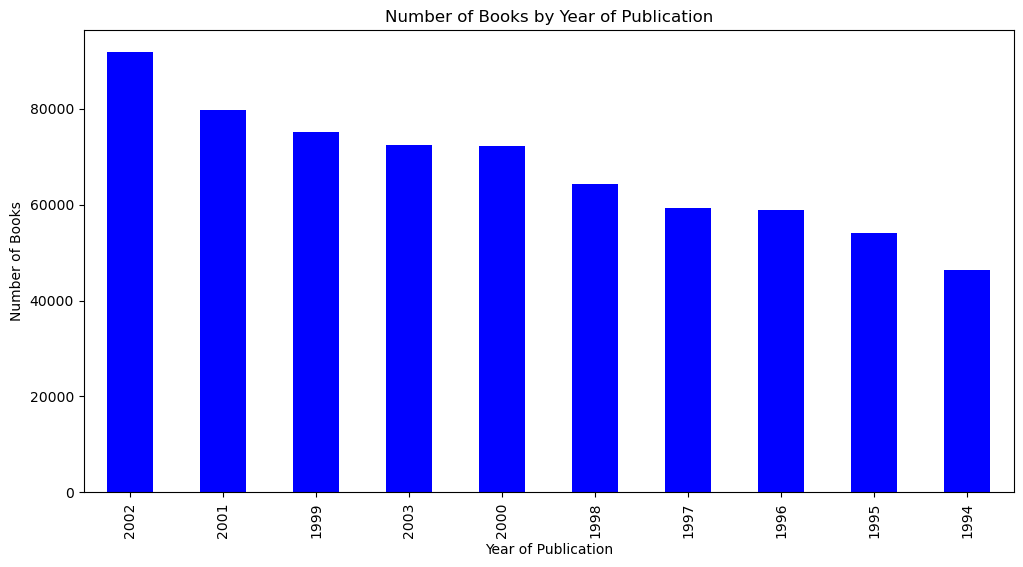

In [325]:
# Group by Year-Of-Publication to count the number of books
books_per_year = book_rec.groupby('Year-Of-Publication')['ISBN'].count().sort_values(ascending=False)

# Display the top 10 years with the most books
print(books_per_year.head(10))

# Plot the number of books per year
plt.figure(figsize=(12, 6))
books_per_year.head(10).plot(kind='bar', color='blue')
plt.title('Number of Books by Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.show()

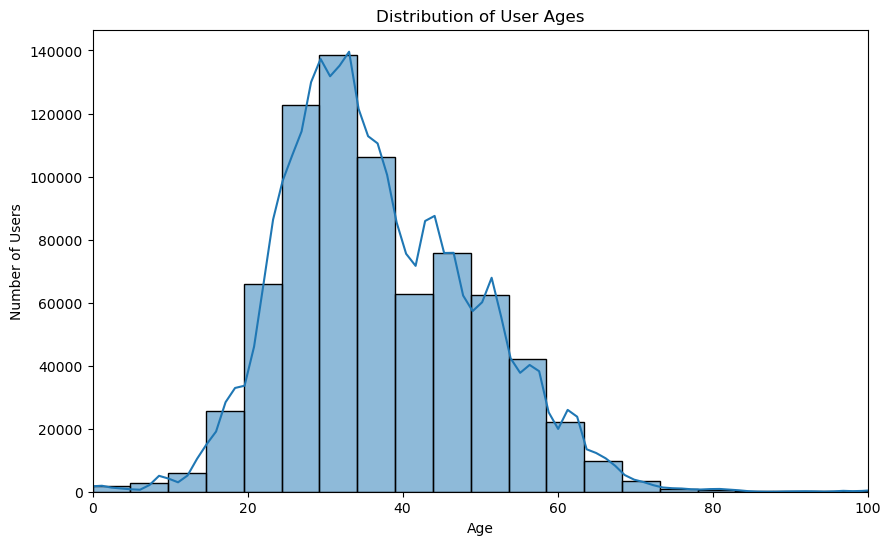

In [326]:
#Distribution of user ages
plt.figure(figsize=(10, 6))
sns.histplot(book_rec['Age'].dropna(), bins=50, kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.xlim(0, 100)
plt.show()

In [327]:
# Descriptive statistics
age_stats = book_rec['Age'].describe()
print(age_stats)

# Alternatively, you can just print mean and median
mean_age = book_rec['Age'].mean()
median_age = book_rec['Age'].median()

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")


count    753330.000000
mean         37.397719
std          14.098189
min           0.000000
25%          28.000000
50%          35.000000
75%          45.000000
max         244.000000
Name: Age, dtype: float64
Mean Age: 37.39771945893566
Median Age: 35.0


In [328]:
skewness = book_rec['Age'].skew()
print(f"Skewness: {skewness}")
#since the skewness we get is postive use median

Skewness: 2.788786192915863


# Data Preprocessing

In [330]:
book_rec.shape

(1031175, 14)

In [331]:
book_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031175 non-null  object 
 1   Book-Title           1031175 non-null  object 
 2   Book-Author          1031173 non-null  object 
 3   Year-Of-Publication  1031175 non-null  int64  
 4   Publisher            1031173 non-null  object 
 5   Image-URL-S          1031175 non-null  object 
 6   Image-URL-M          1031175 non-null  object 
 7   Image-URL-L          1031175 non-null  object 
 8   User-ID              1031175 non-null  int64  
 9   Age                  753330 non-null   float64
 10  Book-Rating          1031175 non-null  int64  
 11  City                 1031175 non-null  object 
 12  State                1031175 non-null  object 
 13  Country              1006978 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 

## Checking for missing values

In [333]:
book_rec.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 2
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 0
User-ID                     0
Age                    277845
Book-Rating                 0
City                        0
State                       0
Country                 24197
dtype: int64

In [334]:
# Display rows where 'Publisher' is missing (NaN)
missing_publisher_rows = book_rec[book_rec['Publisher'].isna()]

# Display the result
missing_publisher_rows


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Age,Book-Rating,City,State,Country
824230,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,98391,52.0,9,morrow,georgia,usa
824539,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,98391,52.0,9,morrow,georgia,usa


In [335]:
# Impute missing Publisher values with 'Unknown Publisher'
book_rec['Publisher'].fillna('Unknown Publisher', inplace=True)


C:\Users\94773\AppData\Local\Temp\ipykernel_13820\1826619563.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  book_rec['Publisher'].fillna('Unknown Publisher', inplace=True)


In [336]:
# Impute missing Authors values with 'Unknown Author'
book_rec['Book-Author'].fillna('Unknown Author', inplace=True)


C:\Users\94773\AppData\Local\Temp\ipykernel_13820\3291138553.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  book_rec['Book-Author'].fillna('Unknown Author', inplace=True)


In [337]:
book_rec.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   0
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 0
User-ID                     0
Age                    277845
Book-Rating                 0
City                        0
State                       0
Country                 24197
dtype: int64

## Getting rid of the Age column

In [339]:
book_rec.drop(['Age'], axis=1, inplace=True)

## For Country there are two types of values called None & n/a for missing values

In [341]:
# Count rows where Country is 'None' or 'n/a'
missing_country_count = book_rec['Country'].isin([None, 'n/a']).sum()

# Display the result
print(f"Number of rows with 'None' or 'n/a' in Country: {missing_country_count}")


Number of rows with 'None' or 'n/a' in Country: 35374


## Deleting rows having n/a for the full location(city,state,country)

In [343]:
# Delete rows where 'Country', 'State', and 'City' are all 'n/a'
book_rec = book_rec[~((book_rec['Country'] == 'n/a') & 
                      (book_rec['State'] == 'n/a') & 
                      (book_rec['City'] == 'n/a'))]

## Imputing Countries using the Cities

In [345]:
# Create a mapping of cities to countries
city_country_mapping = {
  
   "Canada": [
        'fredericton', 'vancouver', 'halifax', 'edmonton', 'calgary', 
        'toronto', 'mississauga', 'saskatoon', 'montreal', 'kincardine', 
        'berkley', 'abbotsford', 'richmond', 'winnipeg', 'kelowna', 
        'st. catharines', 'surrey', 'burlington', 'laval', 'coquitlam', 
        'burnaby', 'markham', 'toronto/newmarket', 'langley', 'victoria'
    ],
    "Mexico": [
        'managua', 'ajijic'
    ],
    "United Kingdom": [
        'london', 'birmingham', 'manchester', 'wolverhampton'
    ],
    "Australia": [
        'sydney', 'melbourne', 'brisbane', 'perth', 'adelaide'
    ],
    "New Zealand": [
        'auckland'
    ],
    "Spain": [
        'madrid', 'barcelona', 'valencia', 'seville'
    ],
    "Germany": [
        'berlin', 'munich', 'frankfurt', 'cologne', 'stuttgart'
    ],
    "France": [
        'paris', 'lyon', 'marseille', 'toulouse'
    ],
    "Italy": [
        'rome', 'milan', 'naples', 'turin'
    ],
    "Singapore": [
        'singapore'
    ],
    "Japan": [
        'tokyo', 'osaka', 'kyoto', 'nagoya'
    ],
    "South Korea": [
        'seoul', 'busan', 'incheon'
    ],
    "Brazil": [
        'são paulo', 'rio de janeiro', 'salvador', 'belo horizonte'
    ],
    "India": [
        'mumbai', 'delhi', 'bangalore', 'kolkata'
    ],
    "Netherlands": [
        'amsterdam', 'rotterdam', 'the hague'
    ],
    "Sweden": [
        'stockholm', 'gothenburg', 'malmo'
    ],
    "Russia": [
        'moscow', 'saint petersburg', 'novosibirsk'
    ]
}

# Define a function to fill missing countries based on cities
def fill_country(row):
    if pd.isna(row['Country'])or row['Country'] == 'n/a':
        return city_country_mapping.get(row['City'].lower(), 'usa')  # Convert city to lowercase for matching
    return row['Country']

# Assuming book_rec is your DataFrame containing a 'City' and 'Country' column
book_rec['Country'] = book_rec.apply(fill_country, axis=1)



### Dropping less informative columns

In [347]:
book_rec.drop(['Image-URL-S','Image-URL-L', 'City' , 'State'], axis=1,inplace=True)

In [348]:
book_rec.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,canada
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0,canada
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,41385,0,canada
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,67544,8,canada
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,85526,0,canada
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,96054,0,canada
8,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,116866,9,usa
9,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,123629,9,canada
10,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,177458,0,canada


## Check for duplicate rows in the entire merged dataset

In [389]:
duplicate_rows = book_rec[book_rec.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


### Remove rows where the Book-Rating is 0

In [395]:
book_rec = book_rec[book_rec['Book-Rating'] != 0]

In [397]:
book_rec.shape

(376904, 9)

In [458]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets (e.g., 80% training, 20% test)
train_df, test_df = train_test_split(book_rec, test_size=0.2, random_state=42)


In [460]:
train_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-M', 'User-ID', 'Age', 'Book-Rating', 'City', 'State',
       'Country'],
      dtype='object')

# Rating Base Filtering-Nethmi

In [98]:
#Grouping the dataset by the columns Book-Title, Book-Author,Year-Of-Publication,Publisher and Image-URL-M.
average_ratings=train_df.groupby(['Book-Title', 'Book-Author','Year-Of-Publication','Publisher','Image-URL-M'])['Book-Rating'].mean().reset_index()

In [100]:
#sorts in descending order of ratings
top_rated_books = average_ratings.sort_values(by='Book-Rating' , ascending=False)

In [102]:
top_rated_books

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Book-Rating
75115,The Blessing Stone,Barbara Wood,2004,St. Martin's Griffin,http://images.amazon.com/images/P/0312320248.0...,10.0
75222,The Bobbsey Twins' Adventure in Washington,Laura Lee Hope,1991,Grosset & Dunlap,http://images.amazon.com/images/P/0448080125.0...,10.0
23612,"Dreaming the Dark : Magic, Sex, and Politics",Starhawk,1997,Beacon Press,http://images.amazon.com/images/P/0807010375.0...,10.0
75225,The Body,Charles Colson,1992,W Publishing Group,http://images.amazon.com/images/P/0849908663.0...,10.0
23610,Dreaming of a Stranger,Sheila O'Flanagan,1997,Poolbeg Press Ltd,http://images.amazon.com/images/P/1853716847.0...,10.0
...,...,...,...,...,...,...
93245,Through the Hidden Door,Rosemary Wells,1988,Scholastic,http://images.amazon.com/images/P/0590440136.0...,1.0
93137,Three Month Fever: The Andrew Cunanan Story,Gary Indiana,1999,Cliff Street Books,http://images.amazon.com/images/P/0060191457.0...,1.0
41182,"Julia, angeklickt. Ein erotischer Internet- Ro...",Carsten Sebastian Henn,2000,Rowohlt TB-V. Rnb.,http://images.amazon.com/images/P/3499262436.0...,1.0
73706,The Adventures of Tom Sawyer (Watermill Classic),Mark Twain,1984,Troll Communications,http://images.amazon.com/images/P/0893753580.0...,1.0


In [104]:
rating_base_recommendation = top_rated_books.head(10)

In [106]:
#convert book-rating column to an integer format
rating_base_recommendation['Book-Rating'] = rating_base_recommendation['Book-Rating'].astype(int)


C:\Users\94773\AppData\Local\Temp\ipykernel_13488\3006698134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['Book-Rating'] = rating_base_recommendation['Book-Rating'].astype(int)


In [108]:
print("Rating base Recommendation System: (Trending books)")
rating_base_recommendation

Rating base Recommendation System: (Trending books)


,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Book-Rating
75115,The Blessing Stone,Barbara Wood,2004,St. Martin's Griffin,http://images.amazon.com/images/P/0312320248.0...,10
75222,The Bobbsey Twins' Adventure in Washington,Laura Lee Hope,1991,Grosset & Dunlap,http://images.amazon.com/images/P/0448080125.0...,10
23612,"Dreaming the Dark : Magic, Sex, and Politics",Starhawk,1997,Beacon Press,http://images.amazon.com/images/P/0807010375.0...,10
75225,The Body,Charles Colson,1992,W Publishing Group,http://images.amazon.com/images/P/0849908663.0...,10
23610,Dreaming of a Stranger,Sheila O'Flanagan,1997,Poolbeg Press Ltd,http://images.amazon.com/images/P/1853716847.0...,10
75235,The Body in the Attic : A Faith Fairchild Myst...,Katherine Hall Page,2004,William Morrow,http://images.amazon.com/images/P/0060525290.0...,10
23600,Dreaming Place,Charles De Lint,1992,Warner Books,http://images.amazon.com/images/P/0446362875.0...,10
23591,Dreamfall,Joan D. Vinge,1996,Warner Books,http://images.amazon.com/images/P/0446516279.0...,10
75260,The Boer War,Thomas Pakenham,1979,Random House,http://images.amazon.com/images/P/0394427424.0...,10
75284,The Bone People,Keri Hulme,1993,Picador,http://images.amazon.com/images/P/0330332805.0...,10


# Content Base Filtering- Pasindu

In [72]:
# Function to recommend books by the same author
def recommend_books_by_author(user_id, df):
    #Get books with higher ratings 
    user_books = book_rec[(book_rec['User-ID'] == user_id) & (book_rec['Book-Rating'] >= 5)]
    
    #Get the authors
    liked_authors = user_books['Book-Author'].unique()
    
    # Get books by the same authors rated by other users but not rated by the current user
    recommendations = book_rec[(book_rec['Book-Author'].isin(liked_authors)) & (book_rec['User-ID'] != user_id) & (~book_rec['ISBN'].isin(user_books['ISBN']))]
    
    recommendations = recommendations[['Book-Title', 'Book-Author', 'ISBN', 'Publisher', 'Year-Of-Publication']].drop_duplicates()
    
    return recommendations

In [74]:
user_id = 2954
recommended_books = recommend_books_by_author(user_id, book_rec)

In [76]:
recommended_books.head()

,Book-Title,Book-Author,ISBN,Publisher,Year-Of-Publication
451056,Torpedo Junction: U-Boat War Off America's Eas...,Homer Hickam,0440210275,Dell Publishing Company,1991
507471,The Coalwood Way,Homer Hickam,0440237165,Island,2001
552653,The Keeper's Son,Homer Hickam,0312301898,Thomas Dunne Books,2003
598148,The Coalwood Way,Homer Hickam,0385335164,Delacorte Press,2000
611638,"American Chica : Two Worlds, One Childhood",Marie Arana,0385319630,Delta,2002


# Collaborative Filtering - Sayuni

## Recommend books to a user based on the preferences of other users who have rated similar books.


In [462]:
#no of books each user has rated
train_df['User-ID'].value_counts()

User-ID
98391     4575
153662    1449
235105     818
248718     771
16795      771
          ... 
179761       1
212834       1
70689        1
41581        1
253105       1
Name: count, Length: 36045, dtype: int64

In [464]:
#no of users
train_df['User-ID'].unique().shape

(36045,)

In [466]:
#no of users who has rated more than 200 books
x = train_df['User-ID'].value_counts() > 200
x[x].shape

(52,)

In [468]:
#user ids of users who has rated more than 200 books
y = x[x].index
y

Index([ 98391, 153662, 235105, 248718,  16795, 171118,  56399, 197659, 185233,
        95359, 114368, 101851, 177458, 204864,  93047,  69078, 100906,  78973,
       257204,  23872, 189334,  63714,  60244,  76626, 123883, 129074,  31826,
        56959, 216012,  51883,  55490, 135265,  31315, 230522, 242006,  30276,
         7346,  46398,  94347, 177432,  16634,  69697,  79441, 110973,  31556,
       168245, 270713, 112001,  88677, 264321, 156150, 225087],
      dtype='int64', name='User-ID')

In [470]:
ratings = train_df[train_df['User-ID'].isin(y)]

In [472]:
ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Age,Book-Rating,City,State,Country
545522,0743250508,"Fire Flight : A Novel (Nance, John J)",John Nance,2003,Simon & Schuster,http://images.amazon.com/images/P/0743250508.0...,98391,52,9,morrow,georgia,usa
423956,0671464043,WHIP HAND,Dick Francis,1982,Pocket,http://images.amazon.com/images/P/0671464043.0...,30276,49,6,wildwood,new jersey,usa
819677,0451459555,From the Heart of the Storm,Kurt R. A. Giambastiani,2004,Roc,http://images.amazon.com/images/P/0451459555.0...,98391,52,10,morrow,georgia,usa
581023,0399135995,Forgiving,Lavyrle Spencer,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135995.0...,153662,44,10,ft. stewart,georgia,usa
946881,0140367853,English Fairy Tales (Puffin Classics),Joseph Jacobs,2004,Puffin Books,http://images.amazon.com/images/P/0140367853.0...,76626,38,7,london,england,united kingdom


In [474]:
ratings.shape

(24169, 12)

In [476]:
#how many ratings each bokk got
book_rating = train_df.groupby('Book-Title')['Book-Rating'].count().reset_index()
book_rating.head()

,Book-Title,Book-Rating
0,"Ask Lily (Young Women of Faith: Lily Series, ...",1
1,Dark Justice,1
2,Earth Prayers From around the World: 365 Pray...,3
3,Final Fantasy Anthology: Official Strategy Gu...,1
4,Flight of Fancy: American Heiresses (Zebra Ba...,1


In [478]:
book_rating.rename(columns = {"Book-Rating": "No_of_ratings"},inplace = True)

In [480]:
book_rating.head()

,Book-Title,No_of_ratings
0,"Ask Lily (Young Women of Faith: Lily Series, ...",1
1,Dark Justice,1
2,Earth Prayers From around the World: 365 Pray...,3
3,Final Fantasy Anthology: Official Strategy Gu...,1
4,Flight of Fancy: American Heiresses (Zebra Ba...,1


In [482]:
#add no of ratings column
final_df= train_df.merge(book_rating, on= 'Book-Title')
final_df.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Age,Book-Rating,City,State,Country,No_of_ratings
0,0385511612,Bleachers,John Grisham,2003,Doubleday,http://images.amazon.com/images/P/0385511612.0...,56554,39,9,rural hall,north carolina,usa,55
1,0044408331,Gertrude and Alice,Diana Souhami,1992,Harpercollins,http://images.amazon.com/images/P/0044408331.0...,123597,44,9,toronto,ontario,canada,2


In [484]:
final_df.shape

(215700, 13)

In [486]:
#books with more or eual to 50  ratings
final_df = final_df[final_df['No_of_ratings']>=50]
final_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Age,Book-Rating,City,State,Country,No_of_ratings
0,0385511612,Bleachers,John Grisham,2003,Doubleday,http://images.amazon.com/images/P/0385511612.0...,56554,39,9,rural hall,north carolina,usa,55
5,0439420105,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2002,Scholastic,http://images.amazon.com/images/P/0439420105.0...,9227,24,7,glendora,california,usa,194
17,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,246311,35,9,lynnwood,washington,usa,384
23,3426616904,About a Boy,Nick Hornby,2002,Distribooks,http://images.amazon.com/images/P/3426616904.0...,97776,48,8,solingen,nordrhein-westfalen,germany,62
33,0345402871,Airframe,Michael Crichton,1997,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,204591,30,7,toronto,ontario,canada,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215629,0156027321,Life of Pi,Yann Martel,2003,Harvest Books,http://images.amazon.com/images/P/0156027321.0...,209817,27,8,pittsburgh,pennsylvania,usa,208
215631,0316690619,Cradle and All,James Patterson,2000,Little Brown and Company,http://images.amazon.com/images/P/0316690619.0...,46150,53,6,berkeley heights,new jersey,usa,65
215632,0440224764,The Partner,John Grisham,1998,Dell Publishing Company,http://images.amazon.com/images/P/0440224764.0...,128738,52,5,andrews afb,maryland,usa,97
215651,038550926X,The Devil Wears Prada : A Novel,LAUREN WEISBERGER,2003,Doubleday,http://images.amazon.com/images/P/038550926X.0...,135360,39,7,albuquerque,new mexico,usa,55


In [488]:
final_df.shape

(21621, 13)

In [490]:
#getting rid of duplicates
final_df.drop_duplicates(['User-ID','Book-Title'],inplace=True)

In [492]:
final_df.shape

(21552, 13)

Pivote Table

In [495]:
book_pivot = final_df.pivot_table(columns='User-ID', index='Book-Title', values='Book-Rating')
book_pivot

User-ID,51,99,114,125,165,183,242,254,272,388,...,278552,278554,278586,278653,278683,278723,278755,278798,278836,278843
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"A Child Called \It\"": One Child's Courage to Survive""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
White Oleander : A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
White Oleander : A Novel (Oprah's Book Club),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
Who Moved My Cheese? An Amazing Way to Deal with Change in Your Work and in Your Life,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [497]:
book_pivot.shape

(257, 9782)

In [499]:
#handling NaN values
book_pivot.fillna(0, inplace=True)
book_pivot

User-ID,51,99,114,125,165,183,242,254,272,388,...,278552,278554,278586,278653,278683,278723,278755,278798,278836,278843
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"A Child Called \It\"": One Child's Courage to Survive""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
White Oleander : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
White Oleander : A Novel (Oprah's Book Club),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
Who Moved My Cheese? An Amazing Way to Deal with Change in Your Work and in Your Life,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Training the model

In [501]:
#to ignore zeros
from scipy.sparse import csr_matrix

In [513]:
book_sparse = csr_matrix(book_pivot)

In [515]:
book_sparse

<257x9782 sparse matrix of type '<class 'numpy.float64'>'
	with 21552 stored elements in Compressed Sparse Row format>

In [517]:
#importing the clustering algorithm- Nearest Neighbors
#use brute mathosd to identify the cluster

from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')

In [519]:
#fit  the data
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [541]:
distance, suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6 )

In [543]:
distance

array([[ 0.        , 82.38325072, 83.59425818, 85.58621384, 85.9185661 ,
        86.42916175]])

In [545]:
suggestion

array([[237, 228,  94, 204, 232, 181]], dtype=int64)

In [547]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])


Index(['The Witching Hour (Lives of the Mayfair Witches)',
       'The Tale of the Body Thief (Vampire Chronicles (Paperback))',
       'Isle of Dogs', 'The Mummy or Ramses the Damned', 'The Tommyknockers',
       'The Girl Who Loved Tom Gordon'],
      dtype='object', name='Book-Title')


In [549]:
#to identify a book title
book_pivot.index[3]

'A Bend in the Road'

In [551]:
#storing all book names
book_name = book_pivot.index

In [553]:
book_name

Index(['1984', '1st to Die: A Novel', '2nd Chance', 'A Bend in the Road',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Heartbreaking Work of Staggering Genius',
       'A Is for Alibi (Kinsey Millhone Mysteries (Paperback))',
       'A Map of the World', 'A Painted House', 'A Prayer for Owen Meany',
       ...
       'Watership Down', 'We Were the Mulvaneys', 'When the Wind Blows',
       'Where the Heart Is (Oprah's Book Club (Paperback))',
       'While I Was Gone', 'White Oleander : A Novel',
       'White Oleander : A Novel (Oprah's Book Club)',
       'Who Moved My Cheese? An Amazing Way to Deal with Change in Your Work and in Your Life',
       'Wicked: The Life and Times of the Wicked Witch of the West',
       'Wild Animus'],
      dtype='object', name='Book-Title', length=257)

In [559]:
import pickle
pickle.dump(model, open('artifacts/model.pkl', 'wb'))
pickle.dump(book_name, open('artifacts/book_name.pkl', 'wb'))
pickle.dump(final_df, open('artifacts/final_df.pkl', 'wb'))
pickle.dump(book_pivot, open('artifacts/book_pivot.pkl', 'wb'))

Testing the model

In [570]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6 )

    for i in range(len(suggestion)):
        books = book_pivot.index[suggestion[i]]
        for j in books:
            print(j)

In [572]:
book_name = "Wild Animus"
recommend_book(book_name)

Wild Animus
Isle of Dogs
The Girl Who Loved Tom Gordon
Full House (Janet Evanovich's Full Series)
The English Patient
Cause of Death
